# 前言

学习R语言{forestploter}包绘制森林图。

## 基本操作

In [1]:
library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
library(forestploter)

In [7]:
# 导入数据集
data_simple <- read_csv("./data/PFS_forest_simple.csv")

data_simple

Rows: 3 Columns: 5
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (2): Label, NMA HR
dbl (3): HR, LCI, UCI

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Label,HR,LCI,UCI,NMA HR
<chr>,<dbl>,<dbl>,<dbl>,<chr>
Datopotamab deruxtecan vs. IC/PC,0.63,0.52,0.76,"0.63 (0.52, 0.76)"
Datopotamab deruxtecan vs. Sacituzumab govitecan,0.96,0.75,1.24,"0.96 (0.75, 1.24)"
Datopotamab deruxtecan vs. Trastuzumab deruxtecan,1.23,0.91,1.66,"1.23 (0.91, 1.66)"


In [10]:
# 合成HR (LCI, UCI)
data_simple$`NMA Hazard Ratio (95% CI)` <-
  paste(rep(" ", 40), collapse = " ")  # 生成空白占位符

data_simple

Label,HR,LCI,UCI,NMA HR,,,NMA Hazard Ratio (95% CI)
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Datopotamab deruxtecan vs. IC/PC,0.63,0.52,0.76,"0.63 (0.52, 0.76)",,,
Datopotamab deruxtecan vs. Sacituzumab govitecan,0.96,0.75,1.24,"0.96 (0.75, 1.24)",,,
Datopotamab deruxtecan vs. Trastuzumab deruxtecan,1.23,0.91,1.66,"1.23 (0.91, 1.66)",,,


In [11]:
# 创建两列空格命名的空白列
data_simple$` ` <-
  paste(rep(" ", 40), collapse = " ")
data_simple$`  ` <-
  paste(rep(" ", 20), collapse = " ")

data_simple

Label,HR,LCI,UCI,NMA HR,,,NMA Hazard Ratio (95% CI)
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Datopotamab deruxtecan vs. IC/PC,0.63,0.52,0.76,"0.63 (0.52, 0.76)",,,
Datopotamab deruxtecan vs. Sacituzumab govitecan,0.96,0.75,1.24,"0.96 (0.75, 1.24)",,,
Datopotamab deruxtecan vs. Trastuzumab deruxtecan,1.23,0.91,1.66,"1.23 (0.91, 1.66)",,,


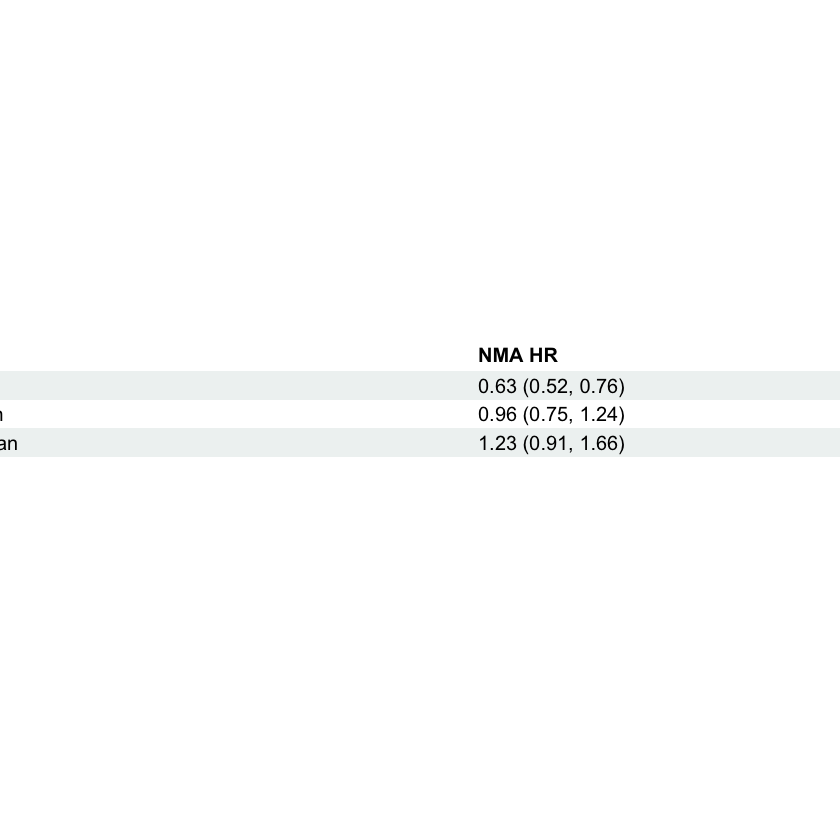

In [14]:
forest <- forest(
  data_simple[, c("Label", " ", "NMA HR", "  ", "NMA Hazard Ratio (95% CI)")],  # 选择列
  est = data_simple$HR,                # 效应量列
  lower = data_simple$LCI,           # CI下限列
  upper = data_simple$UCI,           # CI上限列
  ci_column = 5,                # 空白列的位置（第3列绘制CI条）
  ref_line = 1,                 # 参考线（HR=1）
  xlim = c(0.5, 2.0),           # X轴范围
  ticks_at = c(0.5, 1.0, 2.0),  # X轴刻度
) 

forest